In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [99]:
word_data = pd.read_csv('../data/unigram_freq.csv')
word_data_top1000 = word_data.head(1000)

wheel_data = pd.read_csv('../data/wheeldata.csv')


In [123]:
letter_freq = {}

word_data_top1000['word'] = word_data_top1000.word.astype('str')

excluded = {'r', 's', 't', 'l', 'n', 'e'}

for word in word_data_top1000["word"]:
    for letter in word:
        if letter not in excluded:
            if letter in letter_freq:
                letter_freq[letter] += 1
            else:
                letter_freq[letter] = 1

letter_freq_list = list(letter_freq.items())
print(letter_freq_list)

[('h', 151), ('o', 390), ('f', 92), ('a', 405), ('d', 201), ('i', 370), ('b', 75), ('y', 95), ('w', 85), ('u', 171), ('m', 159), ('v', 71), ('c', 235), ('p', 147), ('g', 134), ('k', 49), ('x', 12), ('j', 19), ('z', 3), ('q', 11)]


C:\Users\axylo\AppData\Local\Temp\ipykernel_21272\1640341755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_data_top1000['word'] = word_data_top1000.word.astype('str')


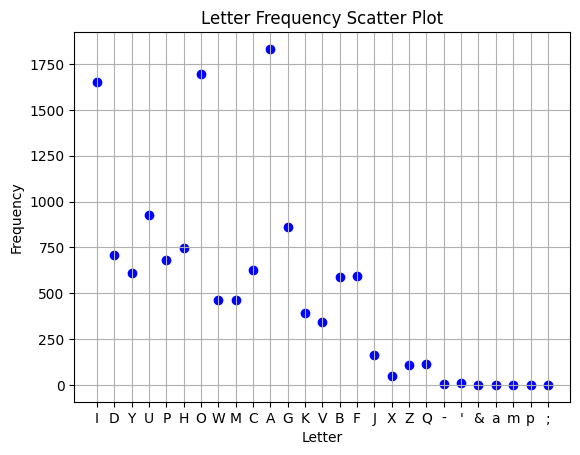

In [112]:
letters, frequencies = letter_freq.keys(), letter_freq.values() # unzips into two lists

plt.scatter(letters, frequencies, color='blue', marker='o')

plt.title('Letter Frequency Scatter Plot')
plt.xlabel('Letter')
plt.ylabel('Frequency')


plt.grid(True)
plt.show()

With the above code in mind, we can make the naive assumption that the combination of A, D, C, and M would be the best in general for finding which would be the best guesses after R, S, T, L, N, E. If we make this data set smaller though, we might get different results. This is the hypothesis based on the data from words in general.

In [121]:
# Basic Summaries

letter_freq2 = {}

wheel_data['Puzzle'] = wheel_data.Puzzle.astype('str')

excluded = {'R', 'S', 'T', 'L', 'N', 'E', ' '}

for puzzle in wheel_data['Puzzle']:
    for letter in puzzle:
        if letter not in excluded and letter.isalnum():
            if letter in letter_freq2:
                letter_freq2[letter] += 1
            else:
                letter_freq2[letter] = 1

letter_freq2_list = list(letter_freq.items())
print(letter_freq2_list)

[('I', 1652), ('D', 708), ('Y', 613), ('U', 928), ('P', 684), ('H', 749), ('O', 1695), ('W', 463), ('M', 465), ('C', 627), ('A', 1832), ('G', 863), ('K', 392), ('V', 344), ('B', 590), ('F', 592), ('J', 162), ('X', 47), ('Z', 109), ('Q', 113), ('-', 6), ("'", 9), ('&', 1), ('a', 1), ('m', 1), ('p', 1), (';', 1)]


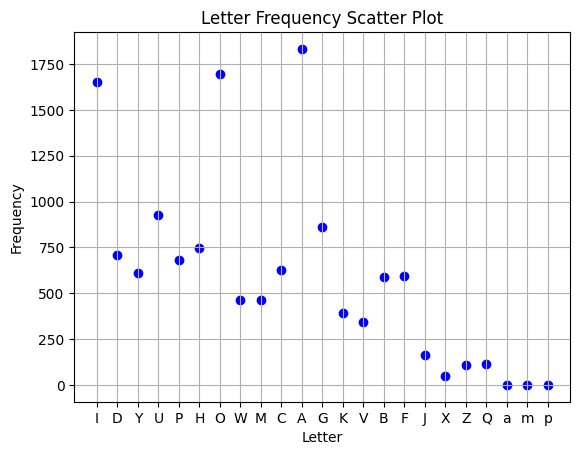

In [122]:
letters2, frequencies2 = letter_freq2.keys(), letter_freq2.values() # unzips into two lists

plt.scatter(letters2, frequencies2, color='blue', marker='o')

plt.title('Letter Frequency Scatter Plot')
plt.xlabel('Letter')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

G, H, D are all the most common consonants and A is the most common vowel in this dataset. However, are the most frequent letters necessarily the best plays? After all, the context in which words occur is important too. We also have to analyze the frequency of the words themselves in the entire dataset as opposed to the letter frequencies. This is before we consider the different categories for each of the puzzles. I will continue to build on this with a statistic model testing these other variables.